In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import copy

from warnings import filterwarnings
filterwarnings("ignore")
import xgboost as xgb
from xgboost import XGBClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [30]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\l\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\l\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\l\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\l\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\l\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\l\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
 

In [7]:
data = pd.read_csv(r'C:\Users\l\Downloads\diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.isnull().sum().sum()

0

In [13]:
data.duplicated().sum()

0

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

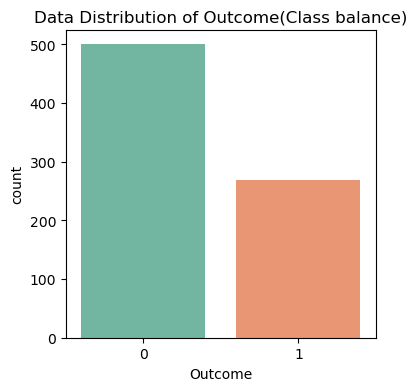

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x=data["Outcome"], palette="Set2")
plt.title("Data Distribution of Outcome(Class balance)")
plt.show()

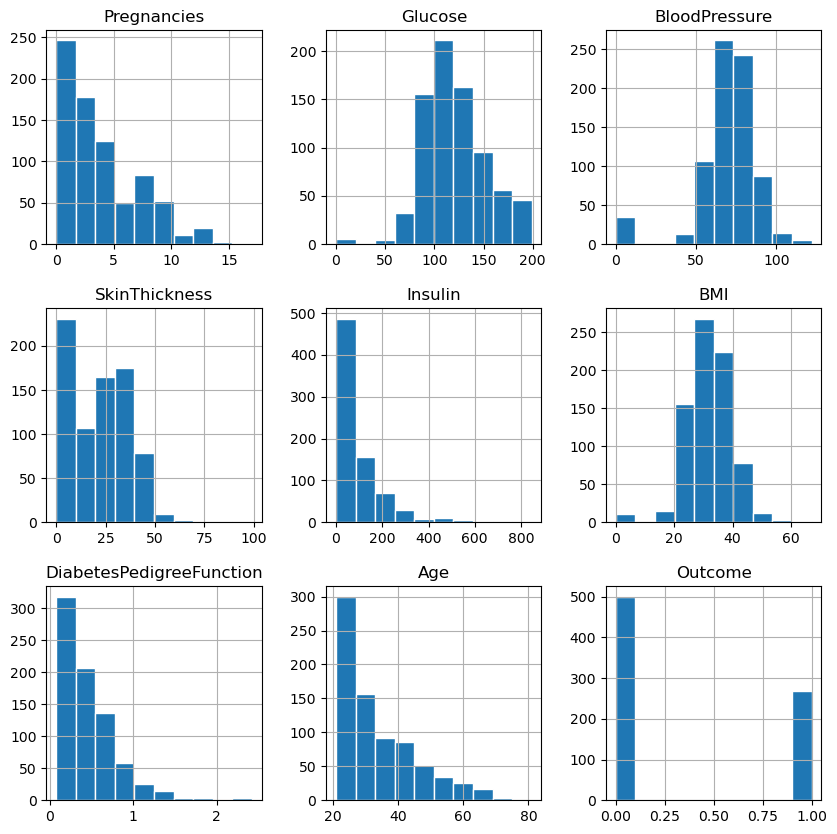

In [19]:
data.hist(figsize=(10,10), edgecolor='white')
plt.show()

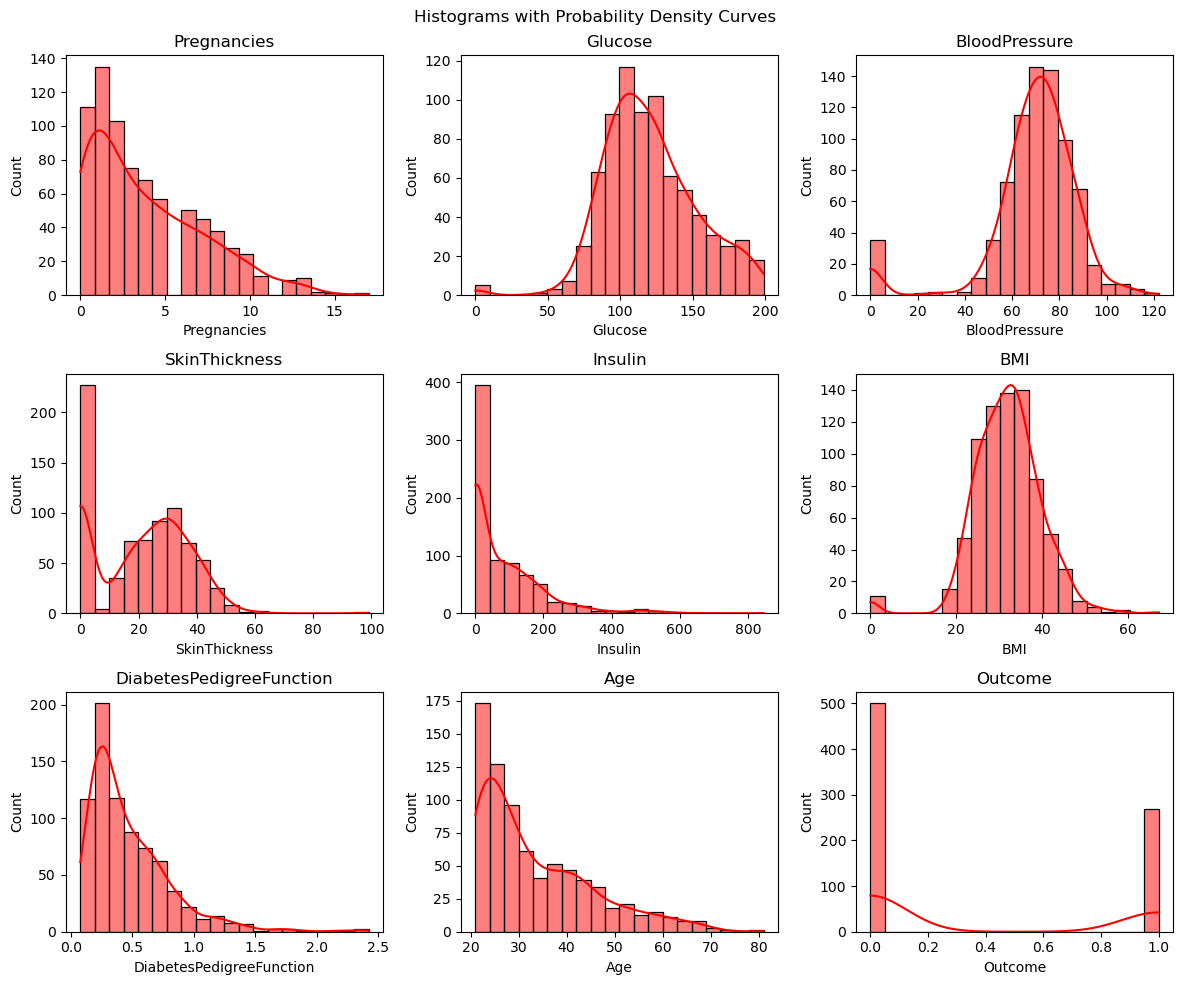

In [24]:

columns_to_plot =data.columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Histograms with Probability Density Curves')

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 3)
    sns.histplot(data[column], bins=20, kde=True, color='red', ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [25]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create each models separately

In [27]:
random_forest = RandomForestClassifier()
svm = SVC()
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
xgb = XGBClassifier()

random_forest.fit(X_train, y_train)  
svm.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)

rf_accuracy = random_forest.score(X_test, y_test)  # X_test and y_test are your test data
svm_accuracy = svm.score(X_test, y_test)
lr_accuracy = logistic_regression.score(X_test, y_test)
knn_accuracy = knn.score(X_test, y_test)
xgb_accuracy = xgb.score(X_test, y_test)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("XGB Accuracy:", xgb_accuracy)


NameError: name 'XGBClassifier' is not defined

# Creating GridSearch & RandomizedSearch with XGBoost model

In [ ]:
xgb = XGBClassifier()


In [ ]:
# Define a grid of parameters to search
param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}


In [ ]:
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [200, 500, 800]})

In [ ]:
print("Best parameters found in GridSearchCV : ", grid_search.best_params_)
print("Best accuracy found  in GridSearchCV : ", grid_search.best_score_)


Best parameters found in GridSearchCV :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best accuracy found  in GridSearchCV :  0.7834332933493269


In [ ]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=param_grid,
                                   n_iter=6, cv=5, random_state=42)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=6,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [200, 500, 800]},
                   random_state=42)

In [ ]:
print("Best parameters found in Randomized Search: ", random_search.best_params_)
print("Best accuracy found in Randomized Search: ", random_search.best_score_)

Best parameters found in Randomized Search:  {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.01}
Best accuracy found in Randomized Search:  0.7769292283086766


In [ ]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set using best model: ", accuracy)


Accuracy on test set using best model:  0.7532467532467533


In [ ]:
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
avg_accuracy = scores.mean()
avg_accuracy

0.7409557762498938

# Creating GridSearch & RandomizedSearch with multiply models



In [ ]:

models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Xgb' : XGBClassifier()

}

param_grid_rf = {'n_estimators':[100,300,500],
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5],
            'max_depth': [3, 5, 7, None]
            }

param_dist_svm = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10],
            'kernel':['rbf', 'linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 5]
            }
param_dist_lr ={'C':[0.01, 0.1, 0.5, 1, 2, 5, 10],
            'penalty':["l1", "l2", "elasticnet"],
            'solver':['liblinear','lbfgs', 'saga']
            }

param_dist_xgb ={'n_estimators': [200, 500, 800],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.01, 0.001]
}

search_strategies = {
    'Random Forest': (param_grid_rf, 'grid'),
    'SVM': (param_dist_svm, 'random'),
    'Logistic Regression': (param_dist_lr, 'random'),
    'Xgb': (param_dist_xgb, 'random')
}

best_models = {}

for name, (param, search_type) in search_strategies.items():
    model = models[name]
    if search_type == 'grid':
        grid_search = GridSearchCV(model, param, cv=5)
    else:
        grid_search = RandomizedSearchCV(model, param, cv=5, n_iter=10)

    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

                                                                                                                                                                            for name, model in best_models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Test Accuracy for {name}: {accuracy}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Best score for Random Forest: 0.7883513261362122
Best parameters for SVM: {'kernel': 'linear', 'gamma': 5, 'C': 2}
Best score for SVM: 0.7654938024790084
Best parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 5}
Best score for Logistic Regression: 0.7622151139544181
Best parameters for Xgb: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
Best score for Xgb: 0.7834332933493269
Test Accuracy for Random Forest: 0.7532467532467533
Test Accuracy for SVM: 0.7597402597402597
Test Accuracy for Logistic Regression: 0.7662337662337663
Test Accuracy for Xgb: 0.7532467532467533
